In [94]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint

In [2]:
# Setting display options for pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# Loading the dataset
data = pd.read_csv("Base.csv")

In [4]:
# Displaying the first few rows of the dataset
data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,13096.035018,7850.955007,6742.080561,5,5,CB,163,1,BC,0,1,9,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,9223.283431,5745.251481,5941.664859,3,18,CA,154,1,BC,1,1,2,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,4471.472149,5471.988958,5992.555113,15,11,CA,89,1,BC,0,1,30,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,14431.993621,6755.344479,5970.336831,11,13,CA,90,1,BC,0,1,1,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,7601.511579,5124.046930,5940.734212,1,6,CA,91,0,BC,1,1,26,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [5]:
# Checking for null values
print("Null values in each column:")
data.isna().sum()

Null values in each column:


fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [6]:
# Checking for duplicate values
print("Number of duplicate rows:", data.duplicated().sum())

Number of duplicate rows: 0


In [7]:
# Displaying column names
print("Columns in the dataset:")
print(data.columns)

Columns in the dataset:
Index(['fraud_bool', 'income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'employment_status', 'credit_risk_score', 'email_is_free', 'housing_status', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source', 'session_length_in_minutes', 'device_os', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month'], dtype='object')


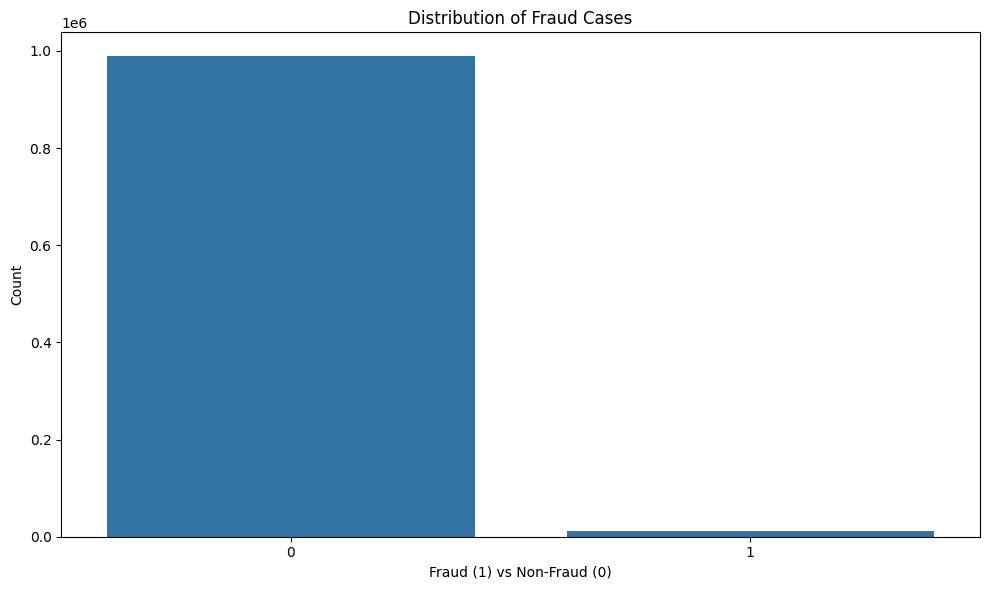

In [8]:
# Visualizing the distribution of the target variable (fraud_bool)
plt.figure(figsize=(10, 6))
sns.countplot(x=data['fraud_bool'])
plt.title('Distribution of Fraud Cases')
plt.xlabel('Fraud (1) vs Non-Fraud (0)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

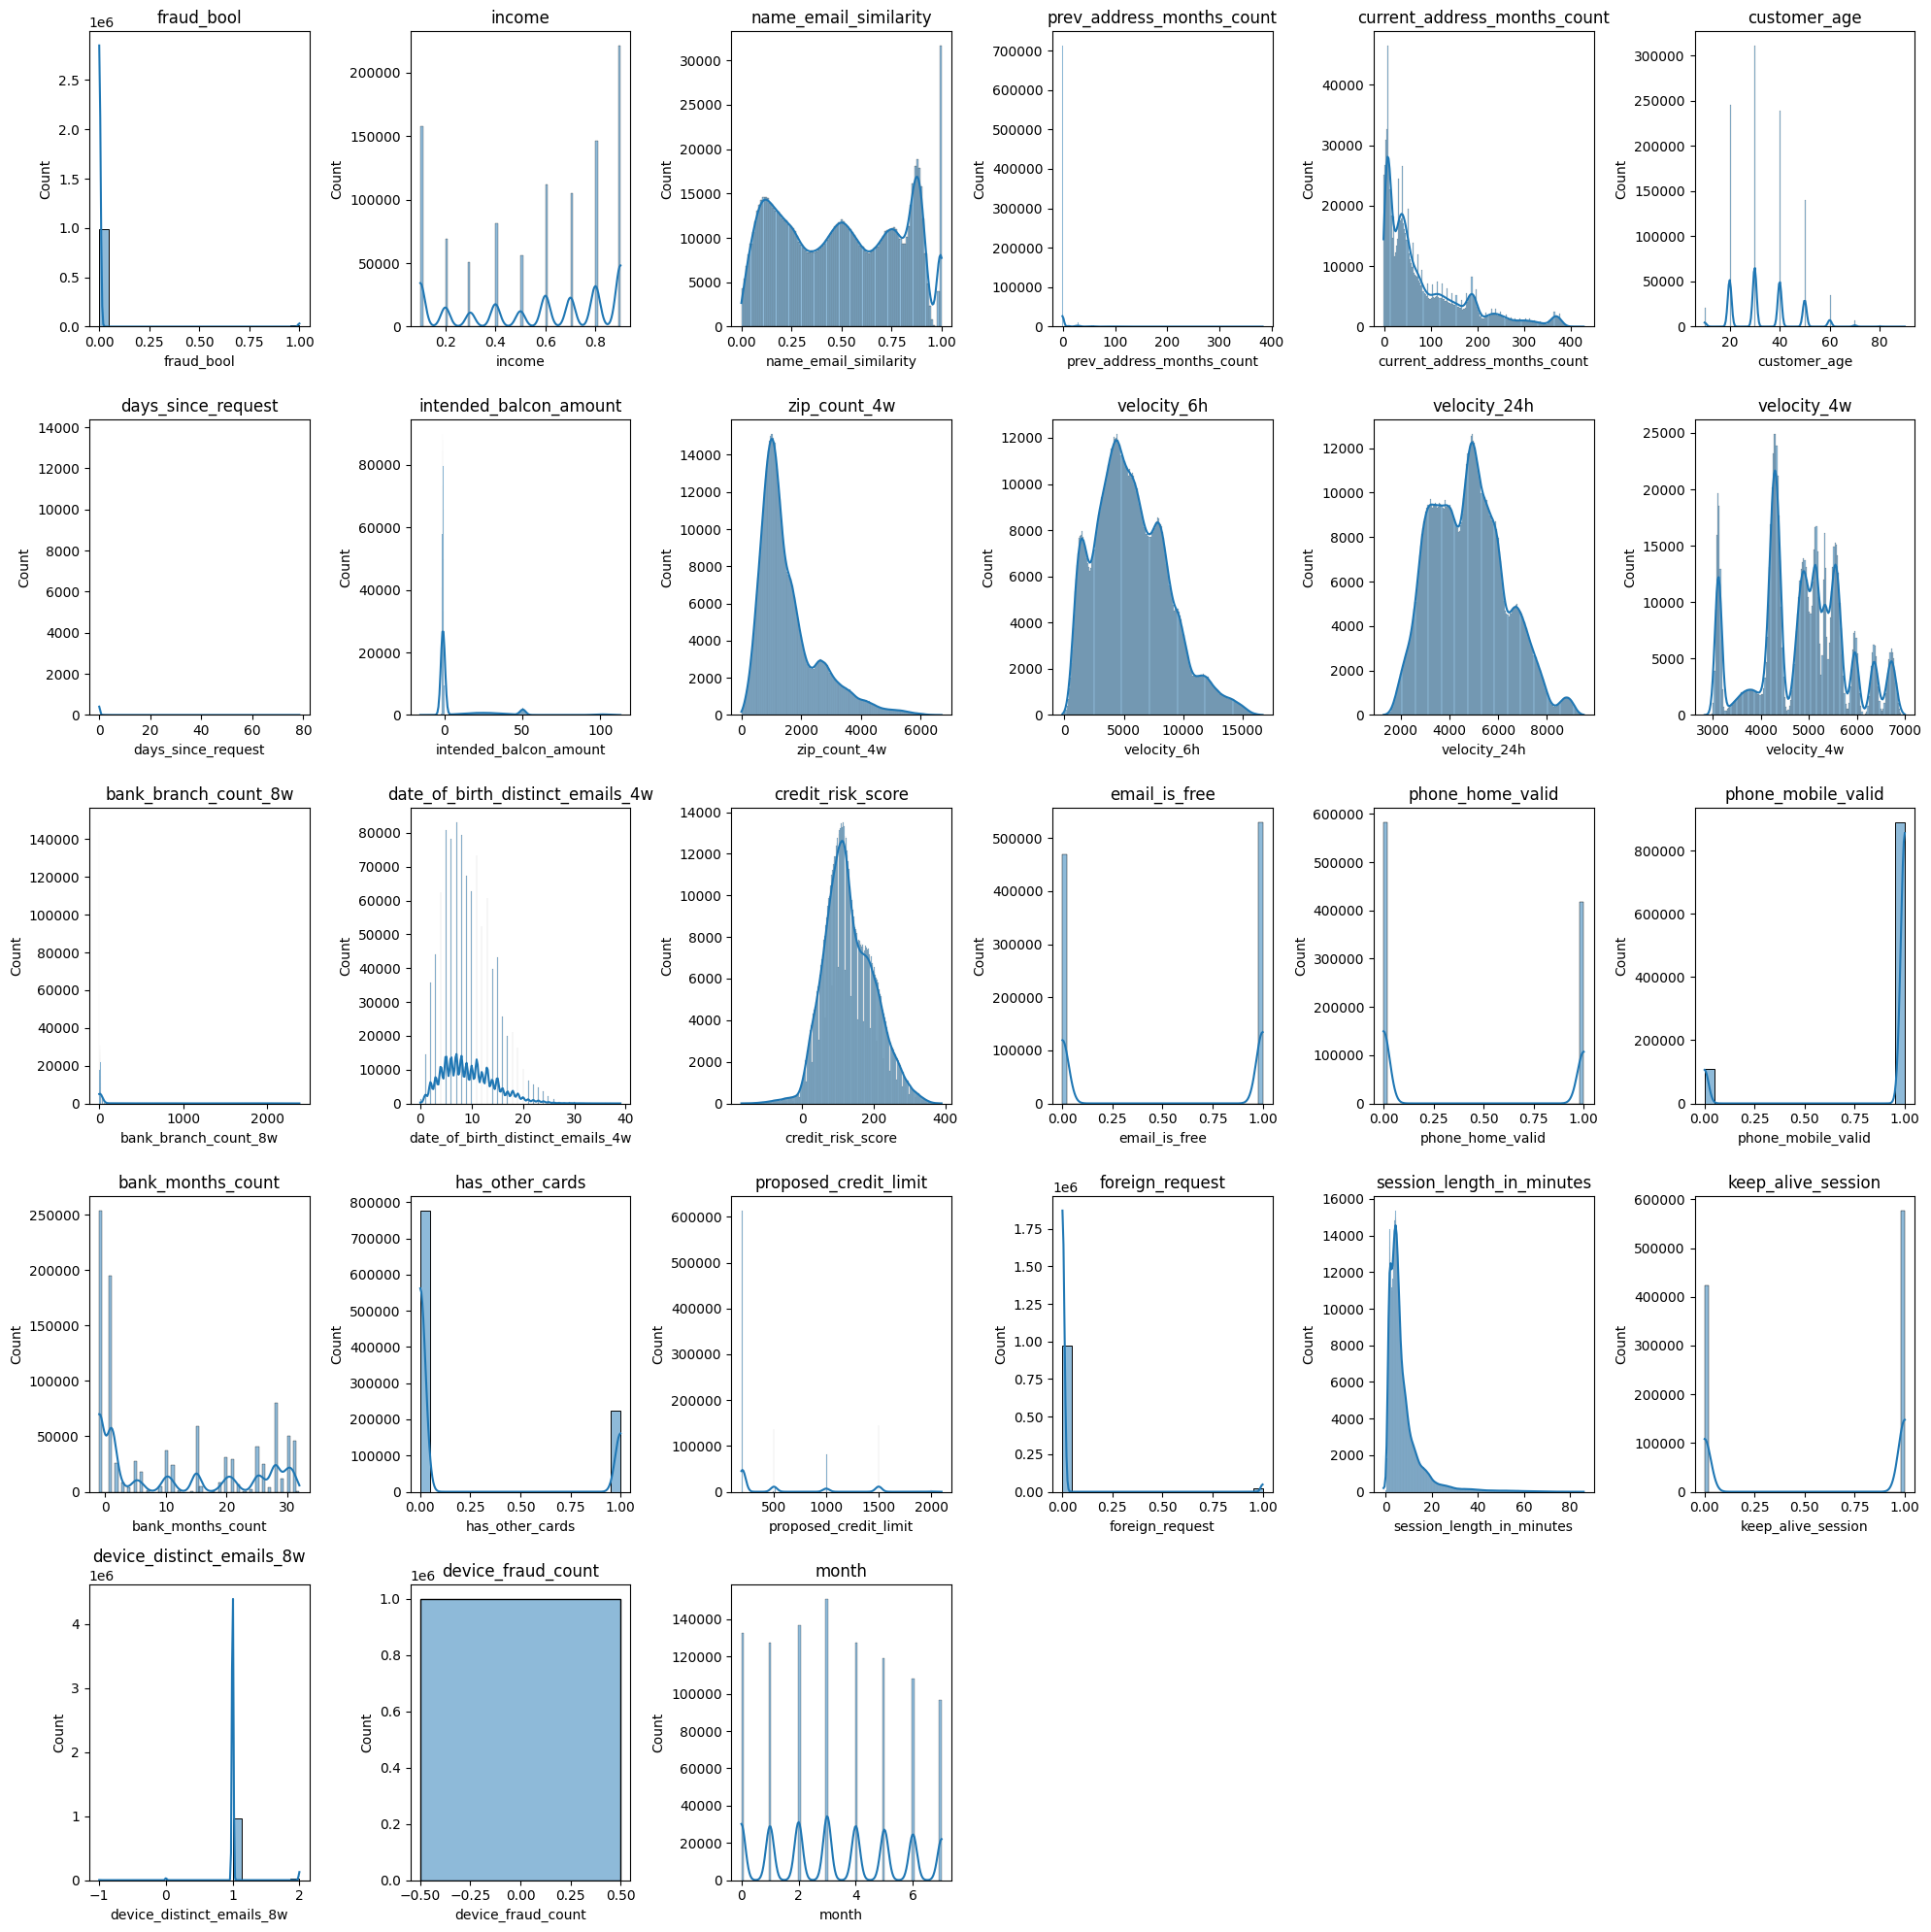

In [10]:
# Visualizing the distribution of numerical features
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20, 20))
for i, col in enumerate(numeric_columns):
    plt.subplot(5, 6, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


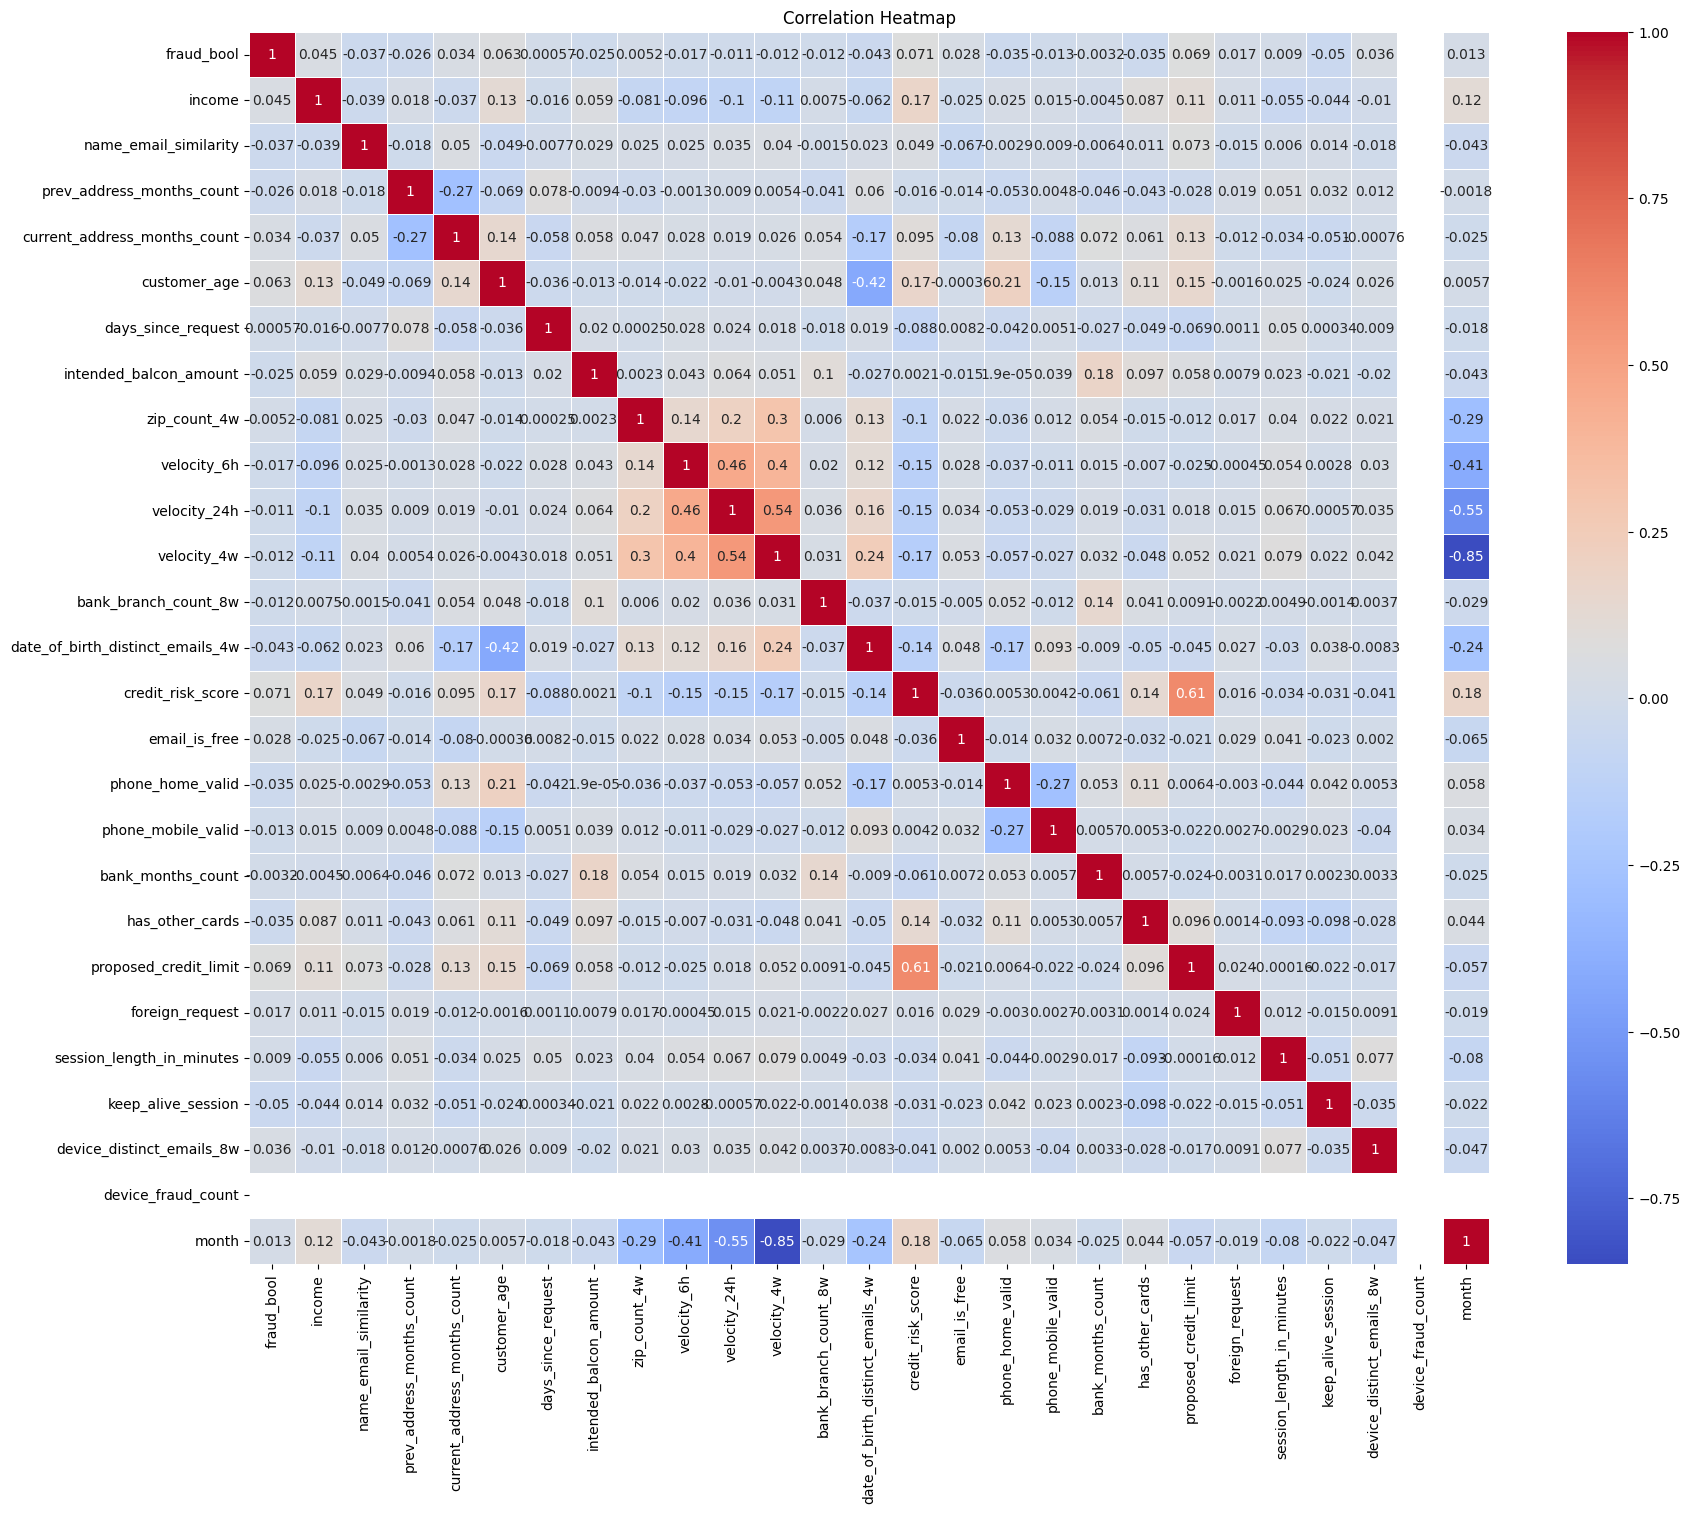

In [11]:
# Correlation heatmap for numerical features
plt.figure(figsize=(20, 16))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Handling missing values (represented as negative values in some columns)
df1 = data.drop(labels=['payment_type', 'employment_status', 'housing_status', 'source', 'device_os'], axis=1)
print('Number of datapoints with no negative values:', np.sum(np.sum((df1<0).astype(int).values, axis=1) == 0).astype(int))
print('Number of datapoints with negative values:', np.sum(np.sum((df1<0).astype(int).values, axis=1) > 0).astype(int))
print('Number of missing values per column:')
print(np.sum((df1<0).astype(int), axis=0))

Number of datapoints with no negative values: 63979
Number of datapoints with negative values: 936021
Number of missing values per column:
fraud_bool                               0
income                                   0
name_email_similarity                    0
prev_address_months_count           712920
current_address_months_count          4254
customer_age                             0
days_since_request                       0
intended_balcon_amount              742523
zip_count_4w                             0
velocity_6h                             44
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
credit_risk_score                    14445
email_is_free                            0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                   253635
has_other_cards                          0
p

In [13]:
# Handling missing values in 'intended_balcon_amount'
data['intended_balcon_amount'] = data['intended_balcon_amount'].apply(lambda x: x if x >= 0 else -1)

In [14]:
# Feature engineering: creating binary columns for missing values and imputing
missing = ['intended_balcon_amount', 'prev_address_months_count', 'current_address_months_count', 'bank_months_count', 'session_length_in_minutes']


In [15]:
for col in missing:
    not_missing = data[col][data[col] != -1]
    data[(col + '_missing')] = (data[col] == -1).astype(int)
    filling = 60 if col == 'intended_balcon_amount' else not_missing.mode().values[0]
    data[col] = data[col].replace(-1, filling)

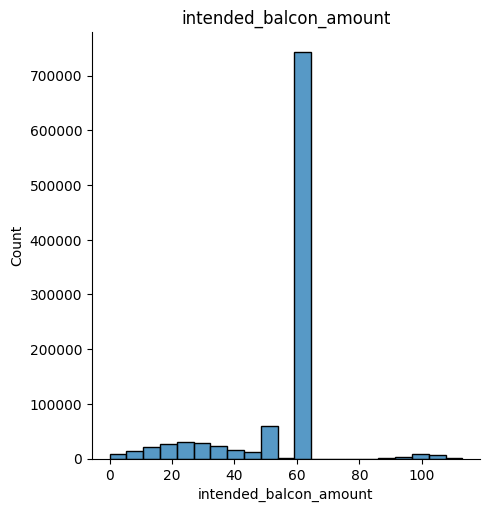

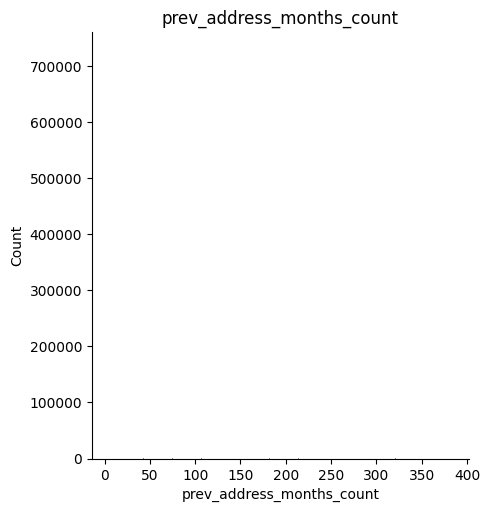

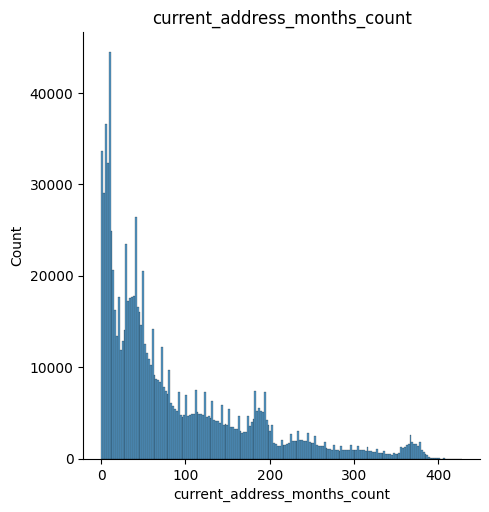

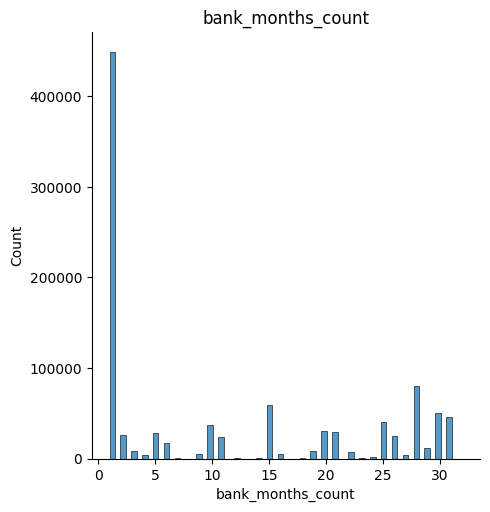

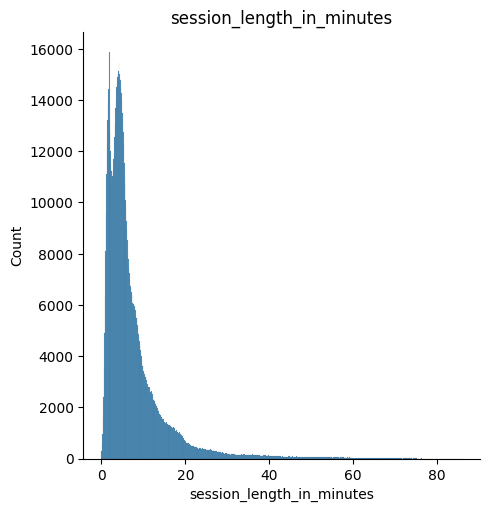

In [16]:
# Visualizing distributions after imputation
for col in missing:
    sns.displot(data[col])
    plt.title(col)
    plt.show()

In [17]:
# Preparing features and target variable
X = data.drop('fraud_bool', axis=1)
y = data['fraud_bool']

In [18]:
# One-hot encoding for categorical variables
colum = X.select_dtypes(include=['object'])
ohe = OneHotEncoder(handle_unknown="ignore")
obj = pd.DataFrame(ohe.fit_transform(colum).toarray())

In [19]:
# Min-Max scaling for selected features
minmx = ['prev_address_months_count','current_address_months_count','days_since_request','zip_count_4w','bank_months_count']
mm = MinMaxScaler()
mim = X[minmx]
MIN = pd.DataFrame(mm.fit_transform(mim), columns=minmx)

In [20]:
# Standard scaling for remaining numerical features
c = [col for col in X.columns if col not in colum.columns and col not in minmx]
st = StandardScaler()
X = pd.DataFrame(st.fit_transform(X[c]), columns=c)

In [21]:
# Combining all processed features
X = pd.concat([X, MIN, obj], axis=1)

<Figure size 2000x2000 with 0 Axes>

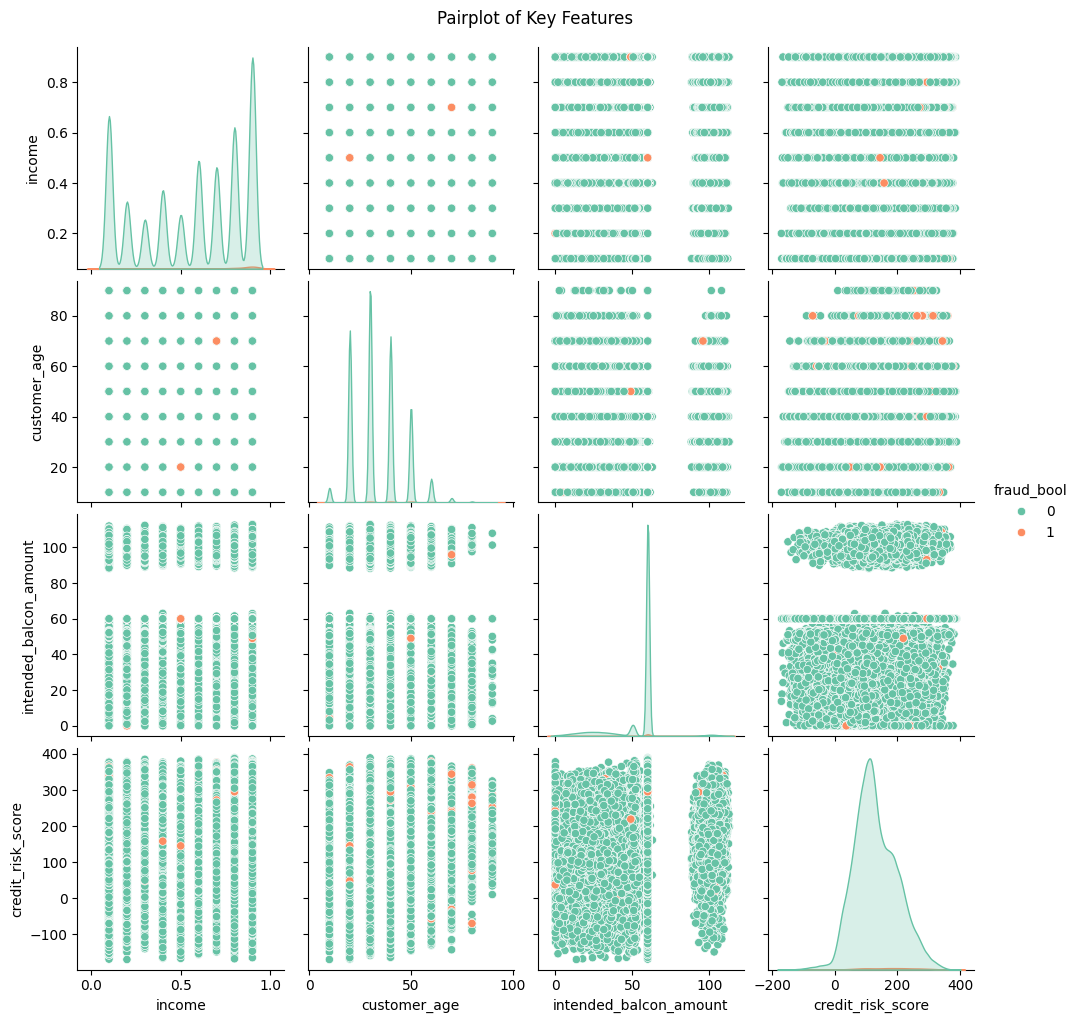

In [22]:
# Pairplot for key features
plt.figure(figsize=(20, 20))
sns.pairplot(data[['income', 'customer_age', 'intended_balcon_amount', 'credit_risk_score', 'fraud_bool']], 
             hue='fraud_bool', palette='Set2')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()


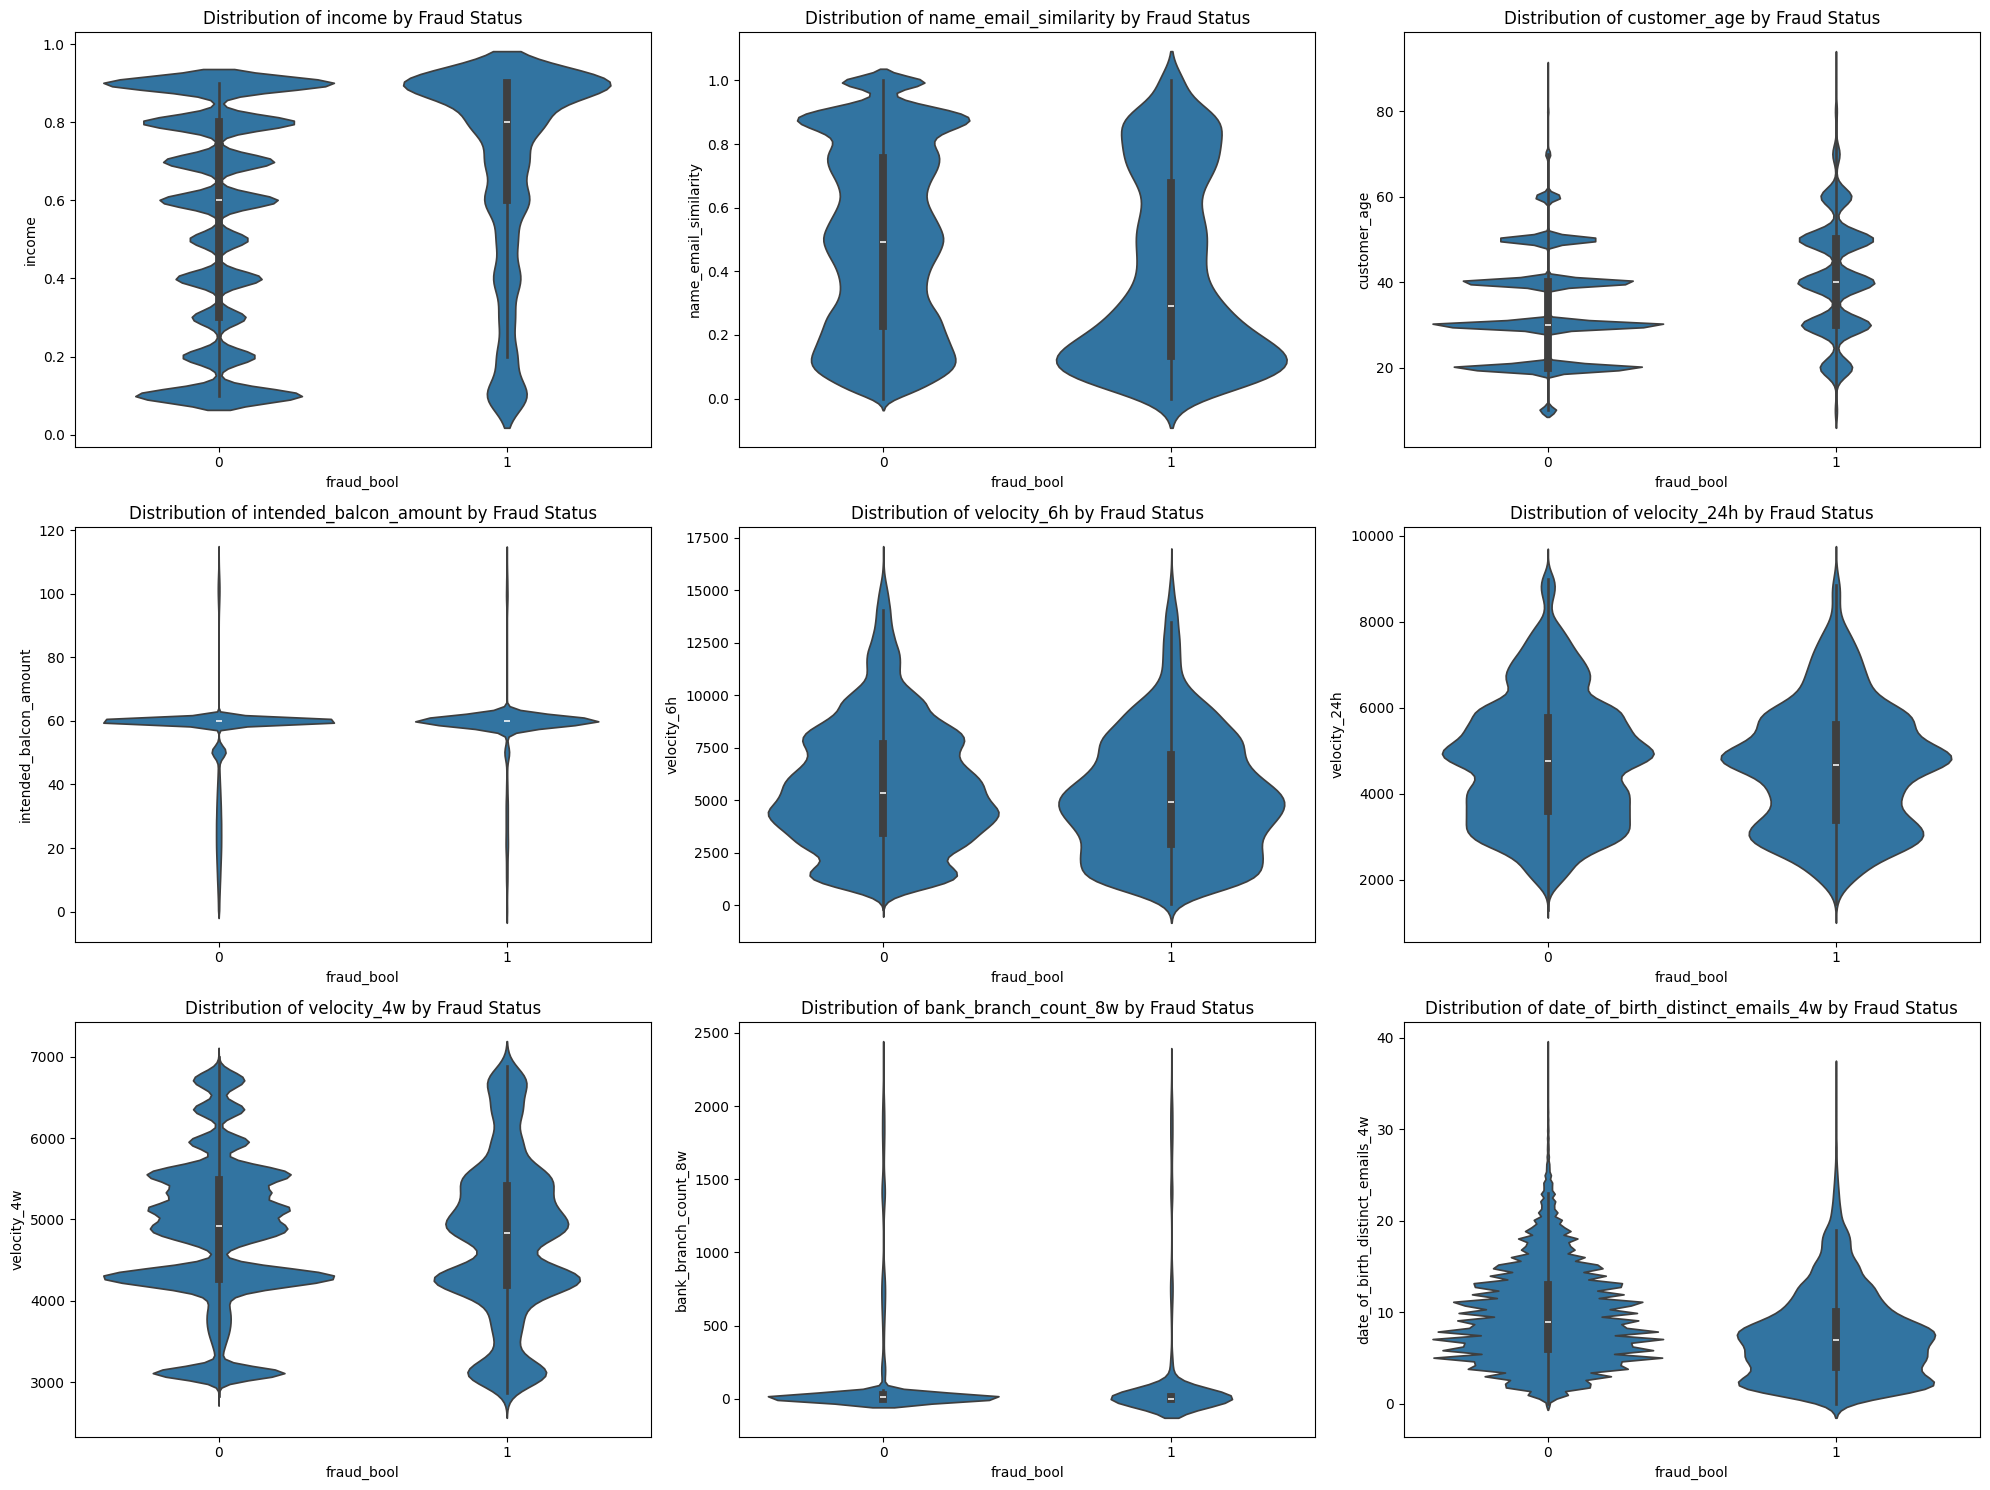

In [23]:
# Violin plots for numerical features
plt.figure(figsize=(20, 15))
for i, column in enumerate(X.select_dtypes(include=['float64', 'int64']).columns[:9]):
    plt.subplot(3, 3, i+1)
    sns.violinplot(x='fraud_bool', y=column, data=data)
    plt.title(f'Distribution of {column} by Fraud Status')
plt.tight_layout()
plt.show()


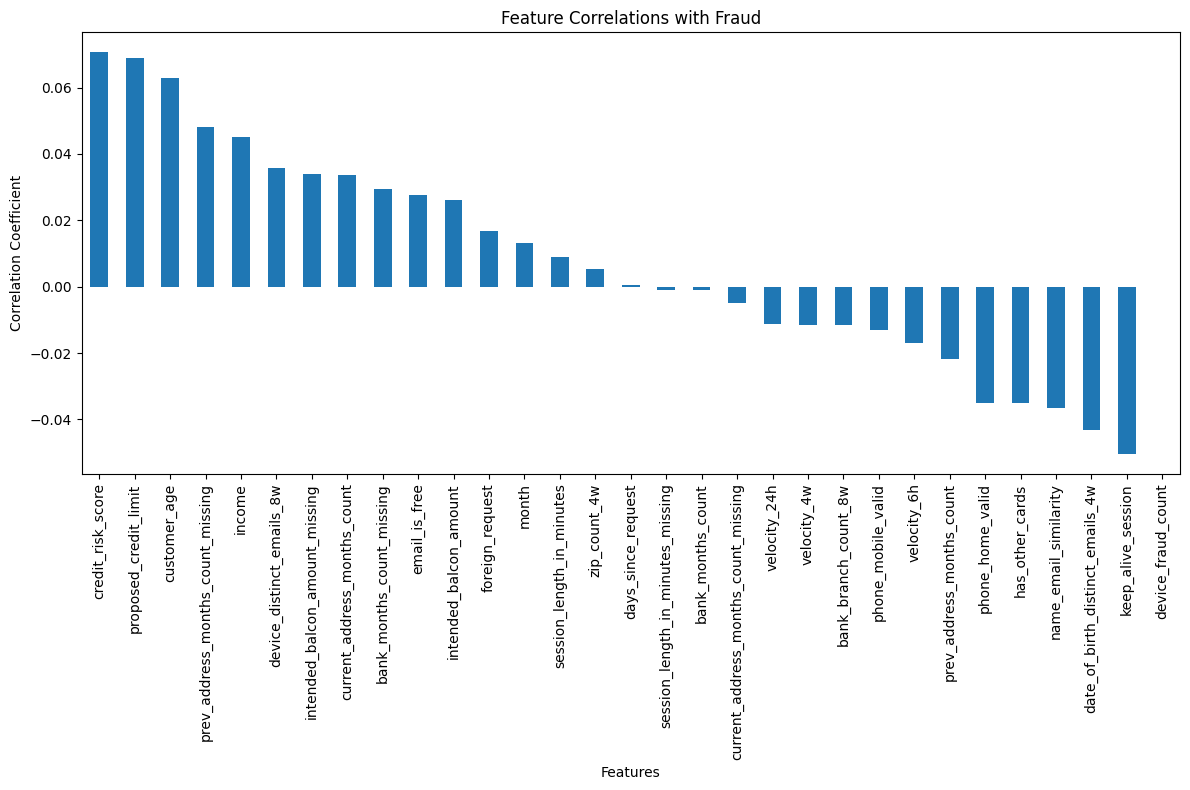

In [27]:
numeric_data = data.select_dtypes(include=[np.number])

# Calculate correlations
correlations = numeric_data.corr()['fraud_bool'].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
correlations.drop('fraud_bool').plot(kind='bar')
plt.title('Feature Correlations with Fraud')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

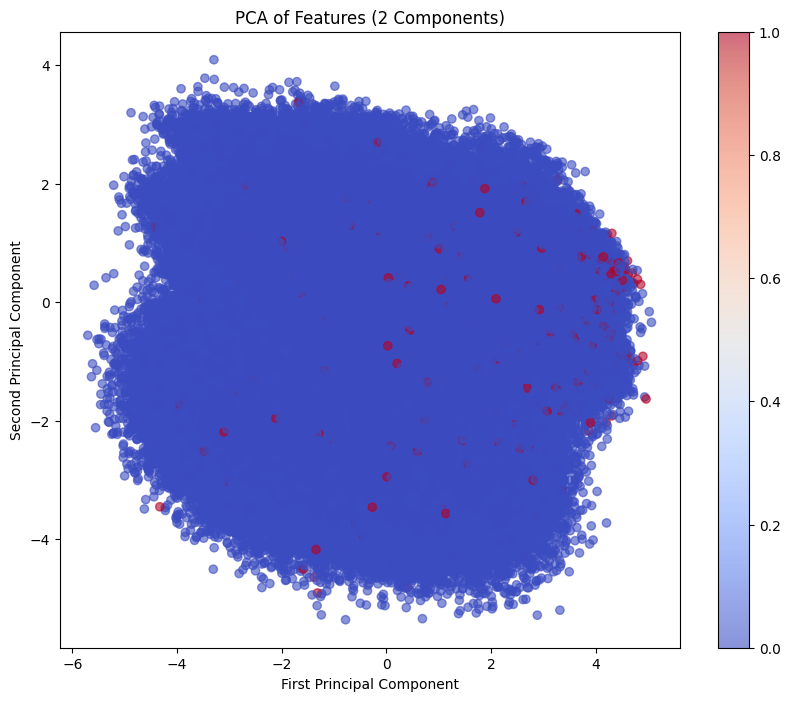

In [28]:
X.columns = X.columns.astype(str)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter)
plt.title('PCA of Features (2 Components)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

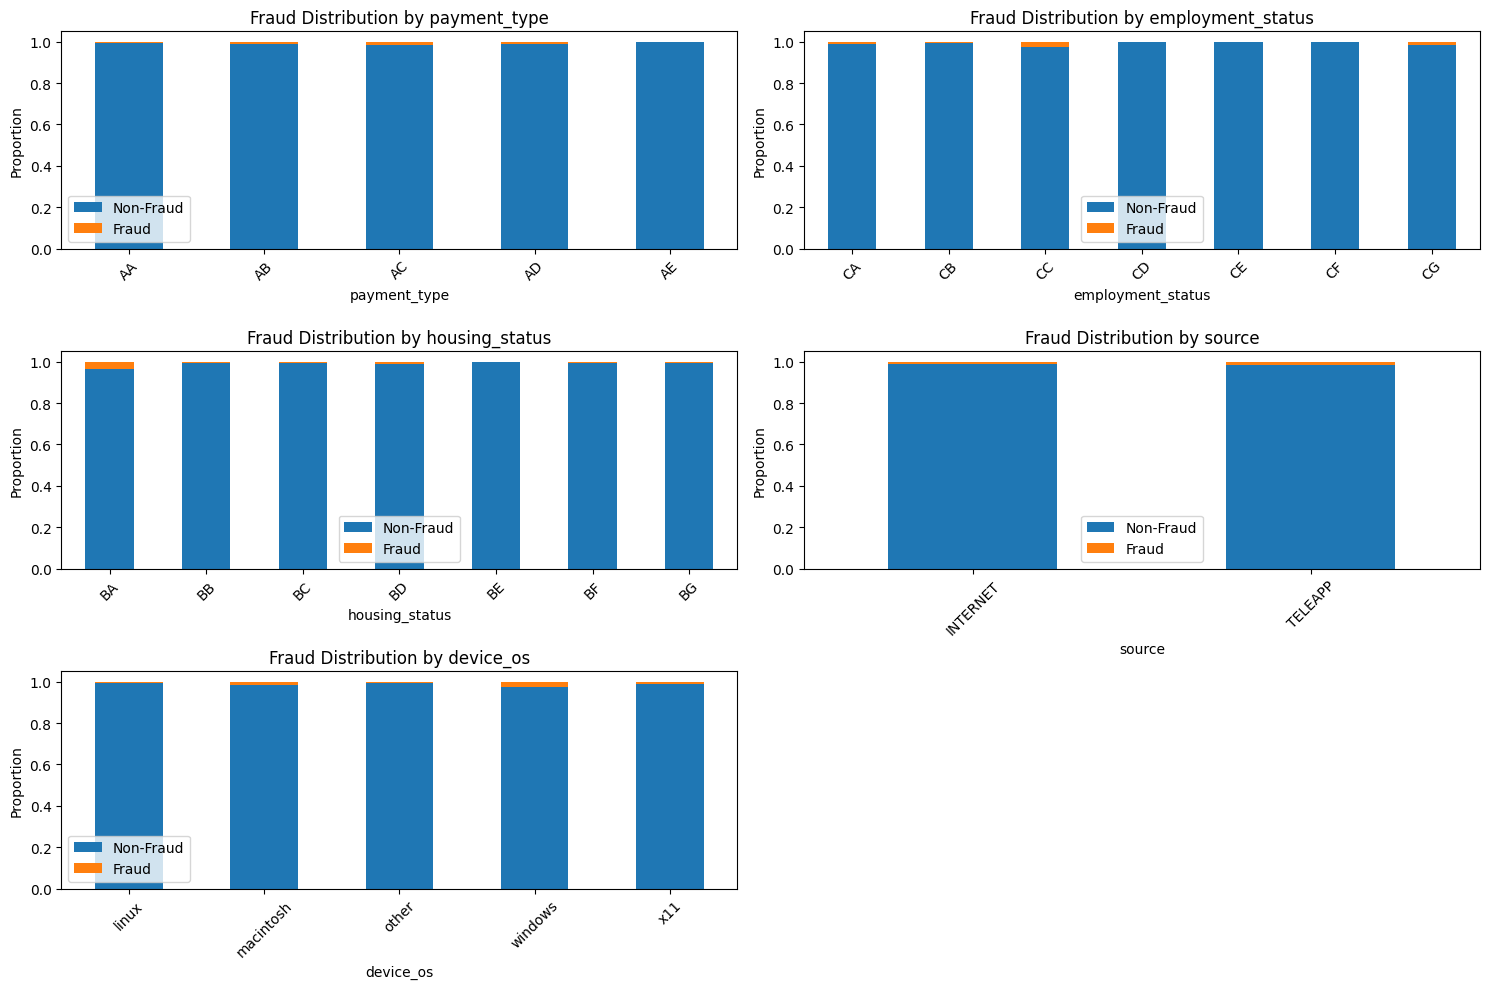

In [33]:
# Stacked bar chart for categorical variables
categorical_vars = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
plt.figure(figsize=(15, 10))
for i, var in enumerate(categorical_vars):
    plt.subplot(3, 2, i+1)
    data_crosstab = pd.crosstab(data[var], data['fraud_bool'], normalize='index')
    data_crosstab.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Fraud Distribution by {var}')
    plt.xlabel(var)
    plt.ylabel('Proportion')
    plt.legend(['Non-Fraud', 'Fraud'])
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_231077/1505871667.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=var, hue='fraud_bool', common_norm=False, shade=True)
/tmp/ipykernel_231077/1505871667.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=var, hue='fraud_bool', common_norm=False, shade=True)
/tmp/ipykernel_231077/1505871667.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=var, hue='fraud_bool', common_norm=False, shade=True)
/tmp/ipykernel_231077/1505871667.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; ple

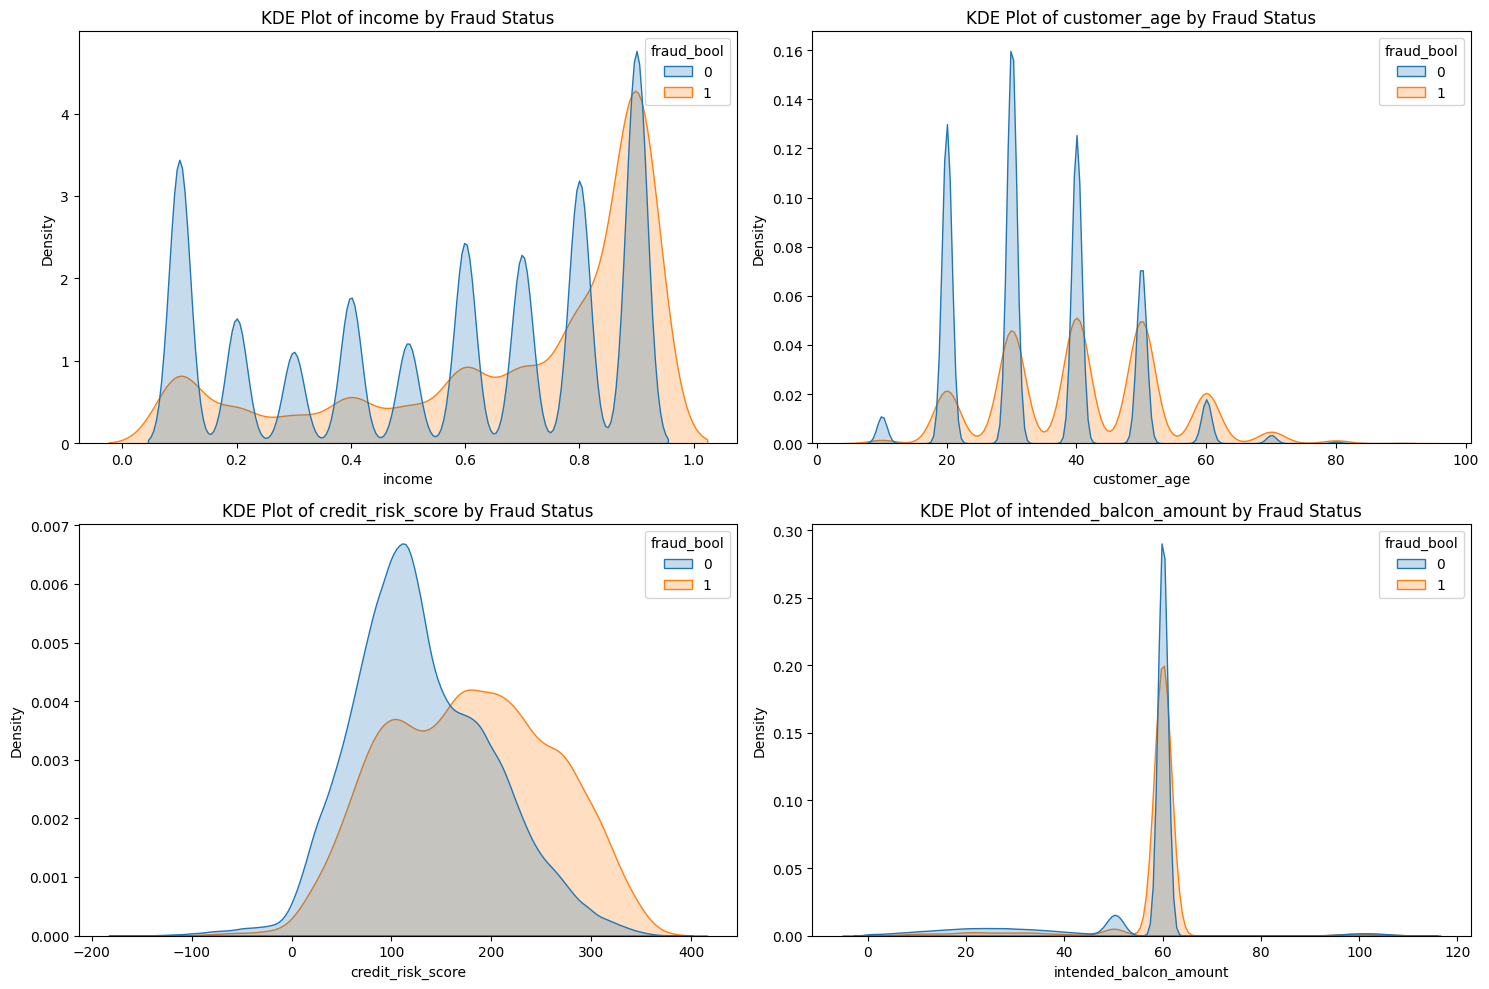

In [34]:
# KDE plots for numerical features
numerical_vars = ['income', 'customer_age', 'credit_risk_score', 'intended_balcon_amount']
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data=data, x=var, hue='fraud_bool', common_norm=False, shade=True)
    plt.title(f'KDE Plot of {var} by Fraud Status')
plt.tight_layout()
plt.show()


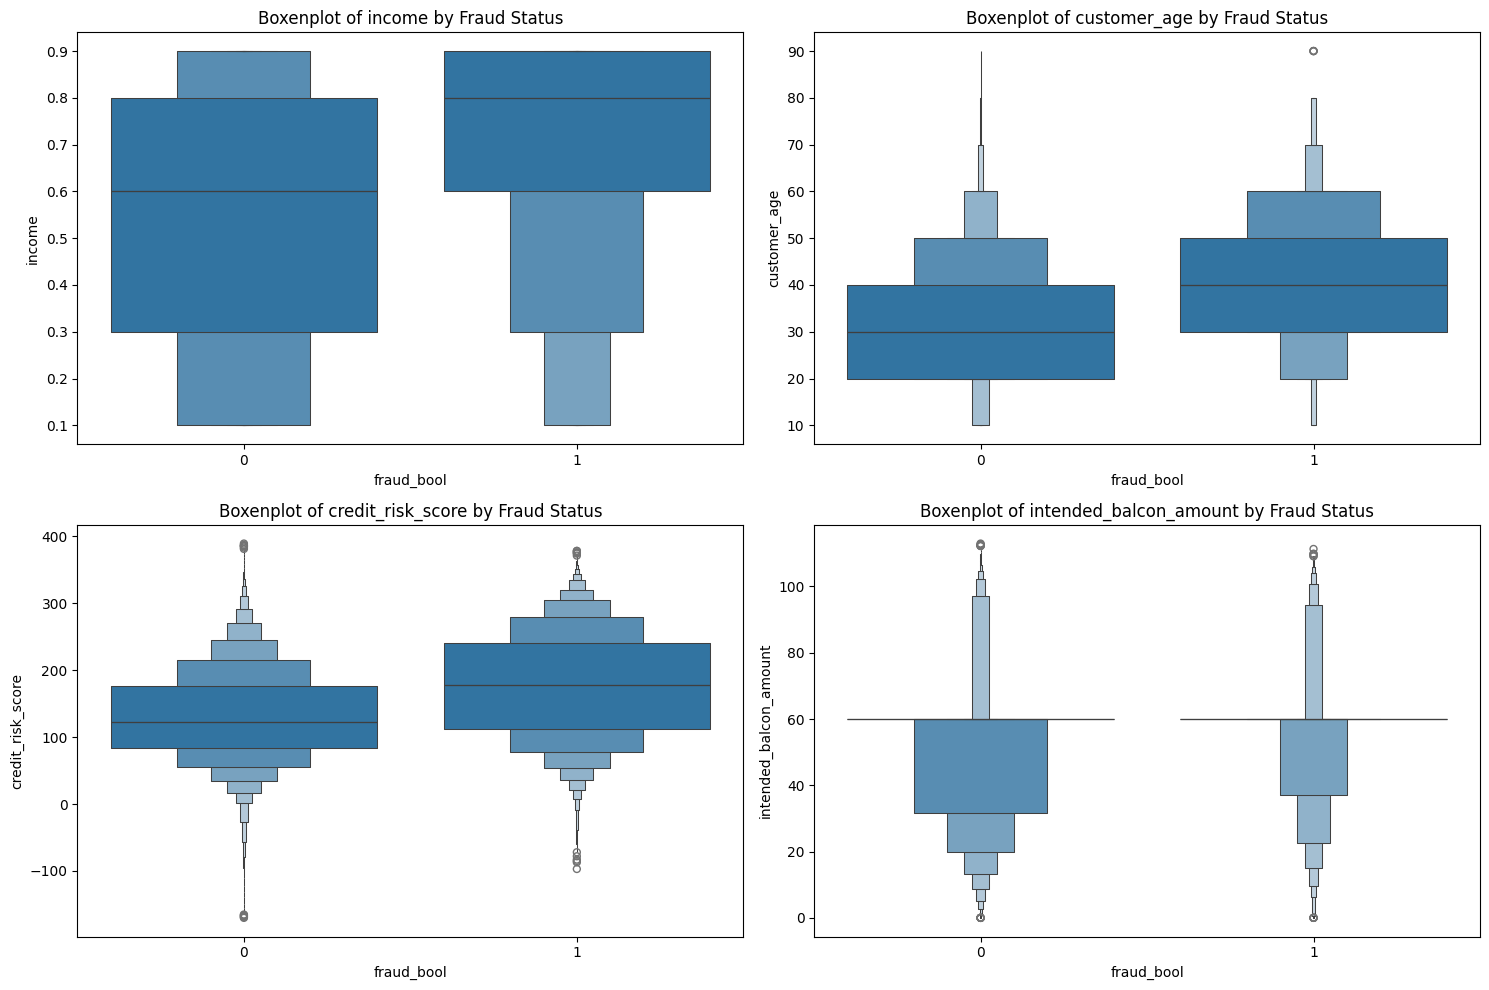

In [35]:
# Boxenplots for numerical features
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars):
    plt.subplot(2, 2, i+1)
    sns.boxenplot(x='fraud_bool', y=var, data=data)
    plt.title(f'Boxenplot of {var} by Fraud Status')
plt.tight_layout()
plt.show()


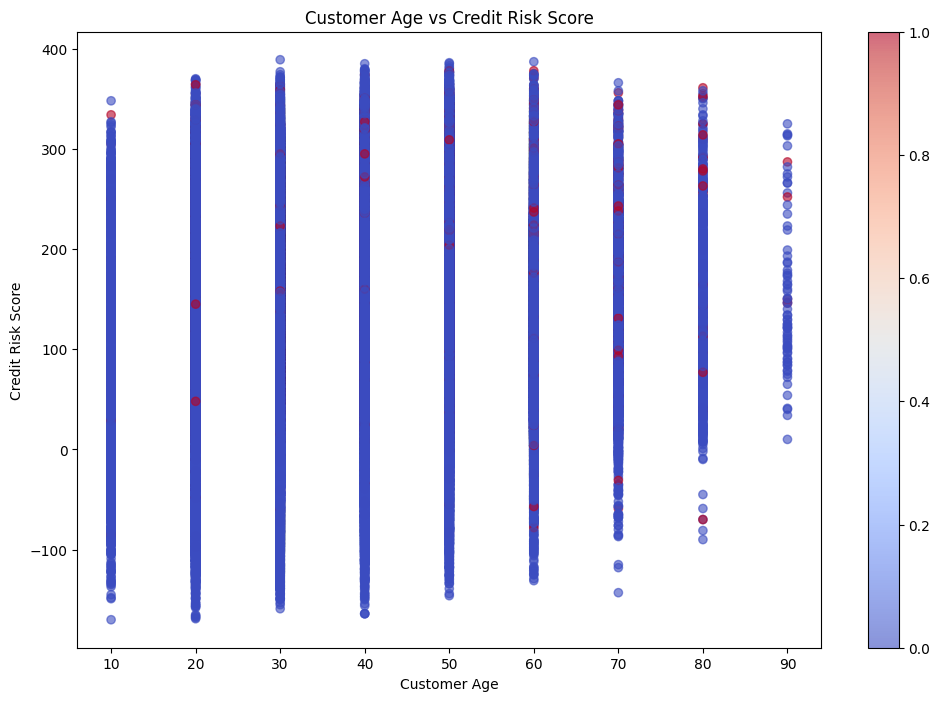

In [36]:
# Relationship between customer age and credit risk score
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data['customer_age'], data['credit_risk_score'], c=data['fraud_bool'], cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter)
plt.title('Customer Age vs Credit Risk Score')
plt.xlabel('Customer Age')
plt.ylabel('Credit Risk Score')
plt.show()


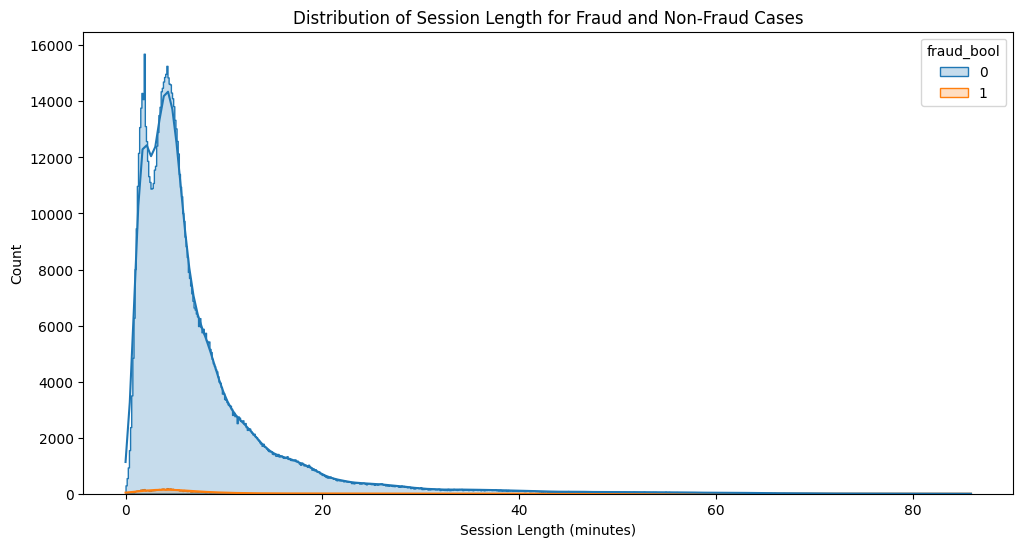

In [37]:
# Distribution of session length for fraud and non-fraud cases
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='session_length_in_minutes', hue='fraud_bool', kde=True, element='step')
plt.title('Distribution of Session Length for Fraud and Non-Fraud Cases')
plt.xlabel('Session Length (minutes)')
plt.ylabel('Count')
plt.show()


In [38]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Fraud rate in train set:", y_train.mean())
print("Fraud rate in test set:", y_test.mean())


Train set shape: (700000, 57)
Test set shape: (300000, 57)
Fraud rate in train set: 0.01102857142857143
Fraud rate in test set: 0.01103


In [39]:
# Handling class imbalance using SMOTE and RandomUnderSampler
over = SMOTE(sampling_strategy=0.1)  # Increase minority class to 10% of majority
under = RandomUnderSampler(sampling_strategy=0.5)  # Reduce majority class to have twice as many samples as minority
resampling = Pipeline([('over', over), ('under', under)])
X_train_resampled, y_train_resampled = resampling.fit_resample(X_train, y_train)

print("Original training set shape:", X_train.shape)
print("Resampled training set shape:", X_train_resampled.shape)
print("Original fraud rate in train set:", y_train.mean())
print("Resampled fraud rate in train set:", y_train_resampled.mean())

Original training set shape: (700000, 57)
Resampled training set shape: (207684, 57)
Original fraud rate in train set: 0.01102857142857143
Resampled fraud rate in train set: 0.3333333333333333


In [69]:
# Define the base models
base_models = {
    'Logistic Regression': LogisticRegression(random_state=7),
    'Decision Tree': DecisionTreeClassifier(random_state=7),
    'Random Forest': RandomForestClassifier(random_state=7),
    'Gradient Boosting': GradientBoostingClassifier(random_state=7),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=7),
    'LightGBM': LGBMClassifier(random_state=7)
}
# Create Voting Classifier
voting_clf = VotingClassifier(
    estimators=[(name, model) for name, model in base_models.items()],
    voting='soft'
)

# Create Bagging Classifier (using Decision Tree as base estimator)
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=10,
    random_state=42
)


In [70]:
# Add ensemble methods to the models dictionary
models = {**base_models, 'Voting Classifier': voting_clf, 'Bagging Classifier': bagging_clf}


In [71]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"Training and evaluating {name}...")
    
    # Fit the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    
    
    results[name] = {
        'F1 Score': f1,
    }
    
    print(f"{name} F1 Score: {f1:.4f}")
    print()

Training and evaluating Logistic Regression...
Logistic Regression F1 Score: 0.1238

Training and evaluating Decision Tree...
Decision Tree F1 Score: 0.0918

Training and evaluating Random Forest...
Random Forest F1 Score: 0.1883

Training and evaluating Gradient Boosting...
Gradient Boosting F1 Score: 0.1965

Training and evaluating Naive Bayes...
Naive Bayes F1 Score: 0.0354

Training and evaluating XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:35:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost F1 Score: 0.2312

Training and evaluating LightGBM...
[LightGBM] [Info] Number of positive: 69228, number of negative: 138456
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12134
[LightGBM] [Info] Number of data points in the train set: 207684, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
LightGBM F1 Score: 0.2306

Training and evaluating Voting Classifier...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:38:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 69228, number of negative: 138456
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12134
[LightGBM] [Info] Number of data points in the train set: 207684, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
Voting Classifier F1 Score: 0.2015

Training and evaluating Bagging Classifier...
Bagging Classifier F1 Score: 0.1555



In [72]:
# Find the best model based on F1 Score
best_model = max(results, key=lambda x: results[x]['F1 Score'])
print(f"\nBest model based on F1 Score: {best_model}")
print(f"F1 Score: {results[best_model]['F1 Score']:.4f}")


Best model based on F1 Score: XGBoost
F1 Score: 0.2312


In [87]:
# Define the parameter space
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 1.0),
    'colsample_bytree': uniform(0.6, 1.0),
    'gamma': uniform(0, 0.5),
    'min_child_weight': randint(1, 10)
}

In [88]:
# Create a base model with GPU acceleration
xgb_model = xgb.XGBClassifier(
    device = "cuda",  # Use GPU accelerated algorithm
    random_state=7,
    eval_metric='logloss'
)

In [89]:
# Instantiate the randomized search
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,  # 5-fold cross-validation
    scoring='f1',
    n_jobs=1,  # Use 1 job as we're using GPU
    verbose=2,
    random_state=42
)

In [90]:
# Fit the randomized search
random_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END colsample_bytree=0.9745401188473625, gamma=0.4753571532049581, learning_rate=0.22959818254342154, max_depth=7, min_child_weight=5, n_estimators=714, subsample=1.0458327528535911; total time=   0.3s
[CV] END colsample_bytree=0.9745401188473625, gamma=0.4753571532049581, learning_rate=0.22959818254342154, max_depth=7, min_child_weight=5, n_estimators=714, subsample=1.0458327528535911; total time=   0.3s
[CV] END colsample_bytree=0.9745401188473625, gamma=0.4753571532049581, learning_rate=0.22959818254342154, max_depth=7, min_child_weight=5, n_estimators=714, subsample=1.0458327528535911; total time=   0.3s
[CV] END colsample_bytree=0.9745401188473625, gamma=0.4753571532049581, learning_rate=0.22959818254342154, max_depth=7, min_child_weight=5, n_estimators=714, subsample=1.0458327528535911; total time=   0.3s
[CV] END colsample_bytree=0.9745401188473625, gamma=0.4753571532049581, learning_rate=0.22959818254342154, ma

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
430 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1531, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 726, in inner_f
 

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device='cuda',
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learni...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f2420194340>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f23e82241c0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f24080dd390>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f23e8263040>},
                   random_state=42, scoring='f1', verbose=2)

In [91]:
# Print the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.4f}".format(random_search.best_score_))

Best parameters found:  {'colsample_bytree': 0.9243450210052739, 'gamma': 0.061043977350336676, 'learning_rate': 0.11688935142309247, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 484, 'subsample': 0.8279351625419417}
Best cross-validation score: 0.9150


In [92]:
# Use the best model to make predictions on the test set
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("F1 score on test set: {:.4f}".format(f1))

F1 score on test set: 0.2207


In [100]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define the base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42)),
    ('lgbm', LGBMClassifier(n_estimators=100, random_state=42))
]

# Define the meta-learner
meta_learner = LogisticRegression()

# Create the stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=5,
    stack_method='predict_proba'
)

# Fit the stacking classifier
stacking_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_stacking = stacking_clf.predict(X_test)

# Calculate F1 score
f1_stacking = f1_score(y_test, y_pred_stacking)
print(f"Stacking Classifier F1 Score: {f1_stacking:.4f}")

# Compare with the best individual model
print(f"Best Individual Model F1 Score: {results[best_model]['F1 Score']:.4f}")
print(f"Model: {best_model}")

# If stacking performs better, update the best model
if f1_stacking > results[best_model]['F1 Score']:
    best_model = 'Stacking Classifier'
    results['Stacking Classifier'] = {'F1 Score': f1_stacking}

print(f"\nBest model based on F1 Score: {best_model}")
print(f"F1 Score: {results[best_model]['F1 Score']:.4f}")

[LightGBM] [Info] Number of positive: 69228, number of negative: 138456
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12134
[LightGBM] [Info] Number of data points in the train set: 207684, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Number of positive: 55383, number of negative: 110764
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12128
[LightGBM] [Info] Number of data points in the train set: 166147, number of used features: 56
[LightGBM] [

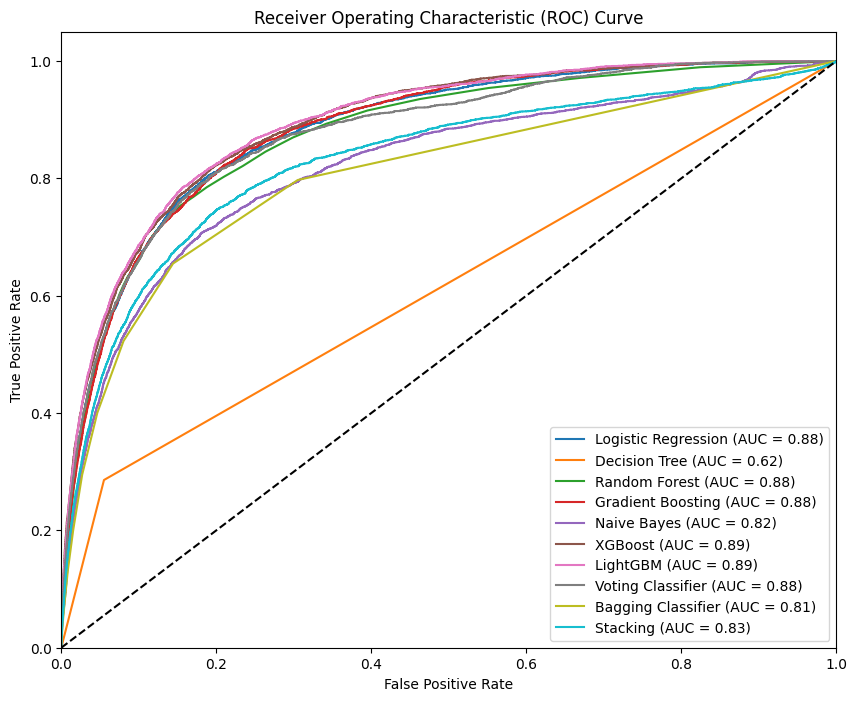

In [101]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each model
fpr = {}
tpr = {}
roc_auc = {}

for name, model in models.items():
    fpr[name], tpr[name], _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc[name] = auc(fpr[name], tpr[name])

# Compute ROC curve for stacking classifier
fpr['Stacking'], tpr['Stacking'], _ = roc_curve(y_test, stacking_clf.predict_proba(X_test)[:,1])
roc_auc['Stacking'] = auc(fpr['Stacking'], tpr['Stacking'])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for name in models.keys():
    plt.plot(fpr[name], tpr[name], label=f'{name} (AUC = {roc_auc[name]:.2f})')
plt.plot(fpr['Stacking'], tpr['Stacking'], label=f'Stacking (AUC = {roc_auc["Stacking"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()